In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.pyplot as plt

plt.style.use("ggplot")

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('C:/Users/Ranesh/OneDrive/Desktop/Datasets/Datasets/E_Commerce_data.csv')
df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,123
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,123


In [4]:
#brief information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [5]:
#check the shape of the dataset
print(df.shape)

(5630, 20)


In [6]:
#print summary statistics of the data including the categorical columns
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,NaN,NaN,NaN,52815.5,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,NaN,NaN,NaN,0.168384,0.37424,0.0,0.0,0.0,0.0,1.0
Tenure,5366.0,NaN,NaN,NaN,10.189899,8.557241,0.0,2.0,9.0,16.0,61.0
PreferredLoginDevice,5630,3,Mobile Phone,2765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CityTier,5630.0,NaN,NaN,NaN,1.654707,0.915389,1.0,1.0,1.0,3.0,3.0
WarehouseToHome,5379.0,NaN,NaN,NaN,15.639896,8.531475,5.0,9.0,14.0,20.0,127.0
PreferredPaymentMode,5630,7,Debit Card,2314,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,5630,2,Male,3384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HourSpendOnApp,5375.0,NaN,NaN,NaN,2.931535,0.721926,0.0,2.0,3.0,3.0,5.0
NumberOfDeviceRegistered,5630.0,NaN,NaN,NaN,3.688988,1.023999,1.0,3.0,4.0,4.0,6.0


In [7]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [8]:
#Remove unnecessary columns
df.drop(columns = ['CustomerID'],inplace = True)

In [9]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [11]:
#count the number of missing values across each columns
df.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [12]:
df.isnull().sum()*100/len(df)

Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

In [13]:
Numerical_columns = ['Tenure','WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder']

for column in list(Numerical_columns):
    df[column].fillna(df[column].median(),inplace = True)

In [14]:
df.isnull().sum()*100/len(df)

Churn                          0.0
Tenure                         0.0
PreferredLoginDevice           0.0
CityTier                       0.0
WarehouseToHome                0.0
PreferredPaymentMode           0.0
Gender                         0.0
HourSpendOnApp                 0.0
NumberOfDeviceRegistered       0.0
PreferedOrderCat               0.0
SatisfactionScore              0.0
MaritalStatus                  0.0
NumberOfAddress                0.0
Complain                       0.0
OrderAmountHikeFromlastYear    0.0
CouponUsed                     0.0
OrderCount                     0.0
DaySinceLastOrder              0.0
CashbackAmount                 0.0
dtype: float64

In [20]:
# Checking duplicate values
df.duplicated().sum()

0

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.duplicated().sum()

0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5072 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5072 non-null   int64  
 1   Tenure                       5072 non-null   float64
 2   PreferredLoginDevice         5072 non-null   object 
 3   CityTier                     5072 non-null   int64  
 4   WarehouseToHome              5072 non-null   float64
 5   PreferredPaymentMode         5072 non-null   object 
 6   Gender                       5072 non-null   object 
 7   HourSpendOnApp               5072 non-null   float64
 8   NumberOfDeviceRegistered     5072 non-null   int64  
 9   PreferedOrderCat             5072 non-null   object 
 10  SatisfactionScore            5072 non-null   int64  
 11  MaritalStatus                5072 non-null   object 
 12  NumberOfAddress              5072 non-null   int64  
 13  Complain               

In [23]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print("")

Churn
[1 0]

Tenure
[ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]

PreferredLoginDevice
['Mobile Phone' 'Phone' 'Computer']

CityTier
[3 1 2]

WarehouseToHome
[  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.  34.
   5.  21. 126.   7.  36. 127.]

PreferredPaymentMode
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender
['Female' 'Male']

HourSpendOnApp
[3. 2. 1. 0. 4. 5.]

NumberOfDeviceRegistered
[3 4 5 2 1 6]

PreferedOrderCat
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

SatisfactionScore
[2 3 5 4 1]

MaritalStatus
['Single' 'Divorced' 'Married']

NumberOfAddress
[ 9  7  6  8  3  2  4 10  1  5 19 21 11 20 22]

Complain
[1 0]

OrderAmountHikeFromlastYear
[11. 15. 14. 23. 22. 16. 12. 13. 17. 18. 24. 19. 20. 21. 25. 26.]

CouponUsed
[ 1.  0

In [24]:
# Category_mapping technique
category_mapping = {'Mobile Phone':'Phone'}
df['PreferredLoginDevice']= df['PreferredLoginDevice'].replace(category_mapping)
df['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Phone       3615
Computer    1457
Name: count, dtype: int64

In [25]:
# Category_mapping technique
category_mapping = {'CC':'Credit Card','COD':'Cash on Delivery'}
df['PreferredPaymentMode']= df['PreferredPaymentMode'].replace(category_mapping)
df['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          2098
Credit Card         1596
E wallet             562
Cash on Delivery     456
UPI                  360
Name: count, dtype: int64

In [26]:
# Category_mapping technique
category_mapping = {'Mobile':'Mobile Phone'}
df['PreferedOrderCat']= df['PreferedOrderCat'].replace(category_mapping)
df['PreferedOrderCat'].value_counts()

PreferedOrderCat
Mobile Phone          1856
Laptop & Accessory    1847
Fashion                763
Grocery                364
Others                 242
Name: count, dtype: int64

In [30]:
count_col = []
hist_col = []
for column in df.columns:
    unique_value = df[column].nunique()
    if unique_value <= 10:
        count_col.append(column)
    else:
        hist_col.append(column)

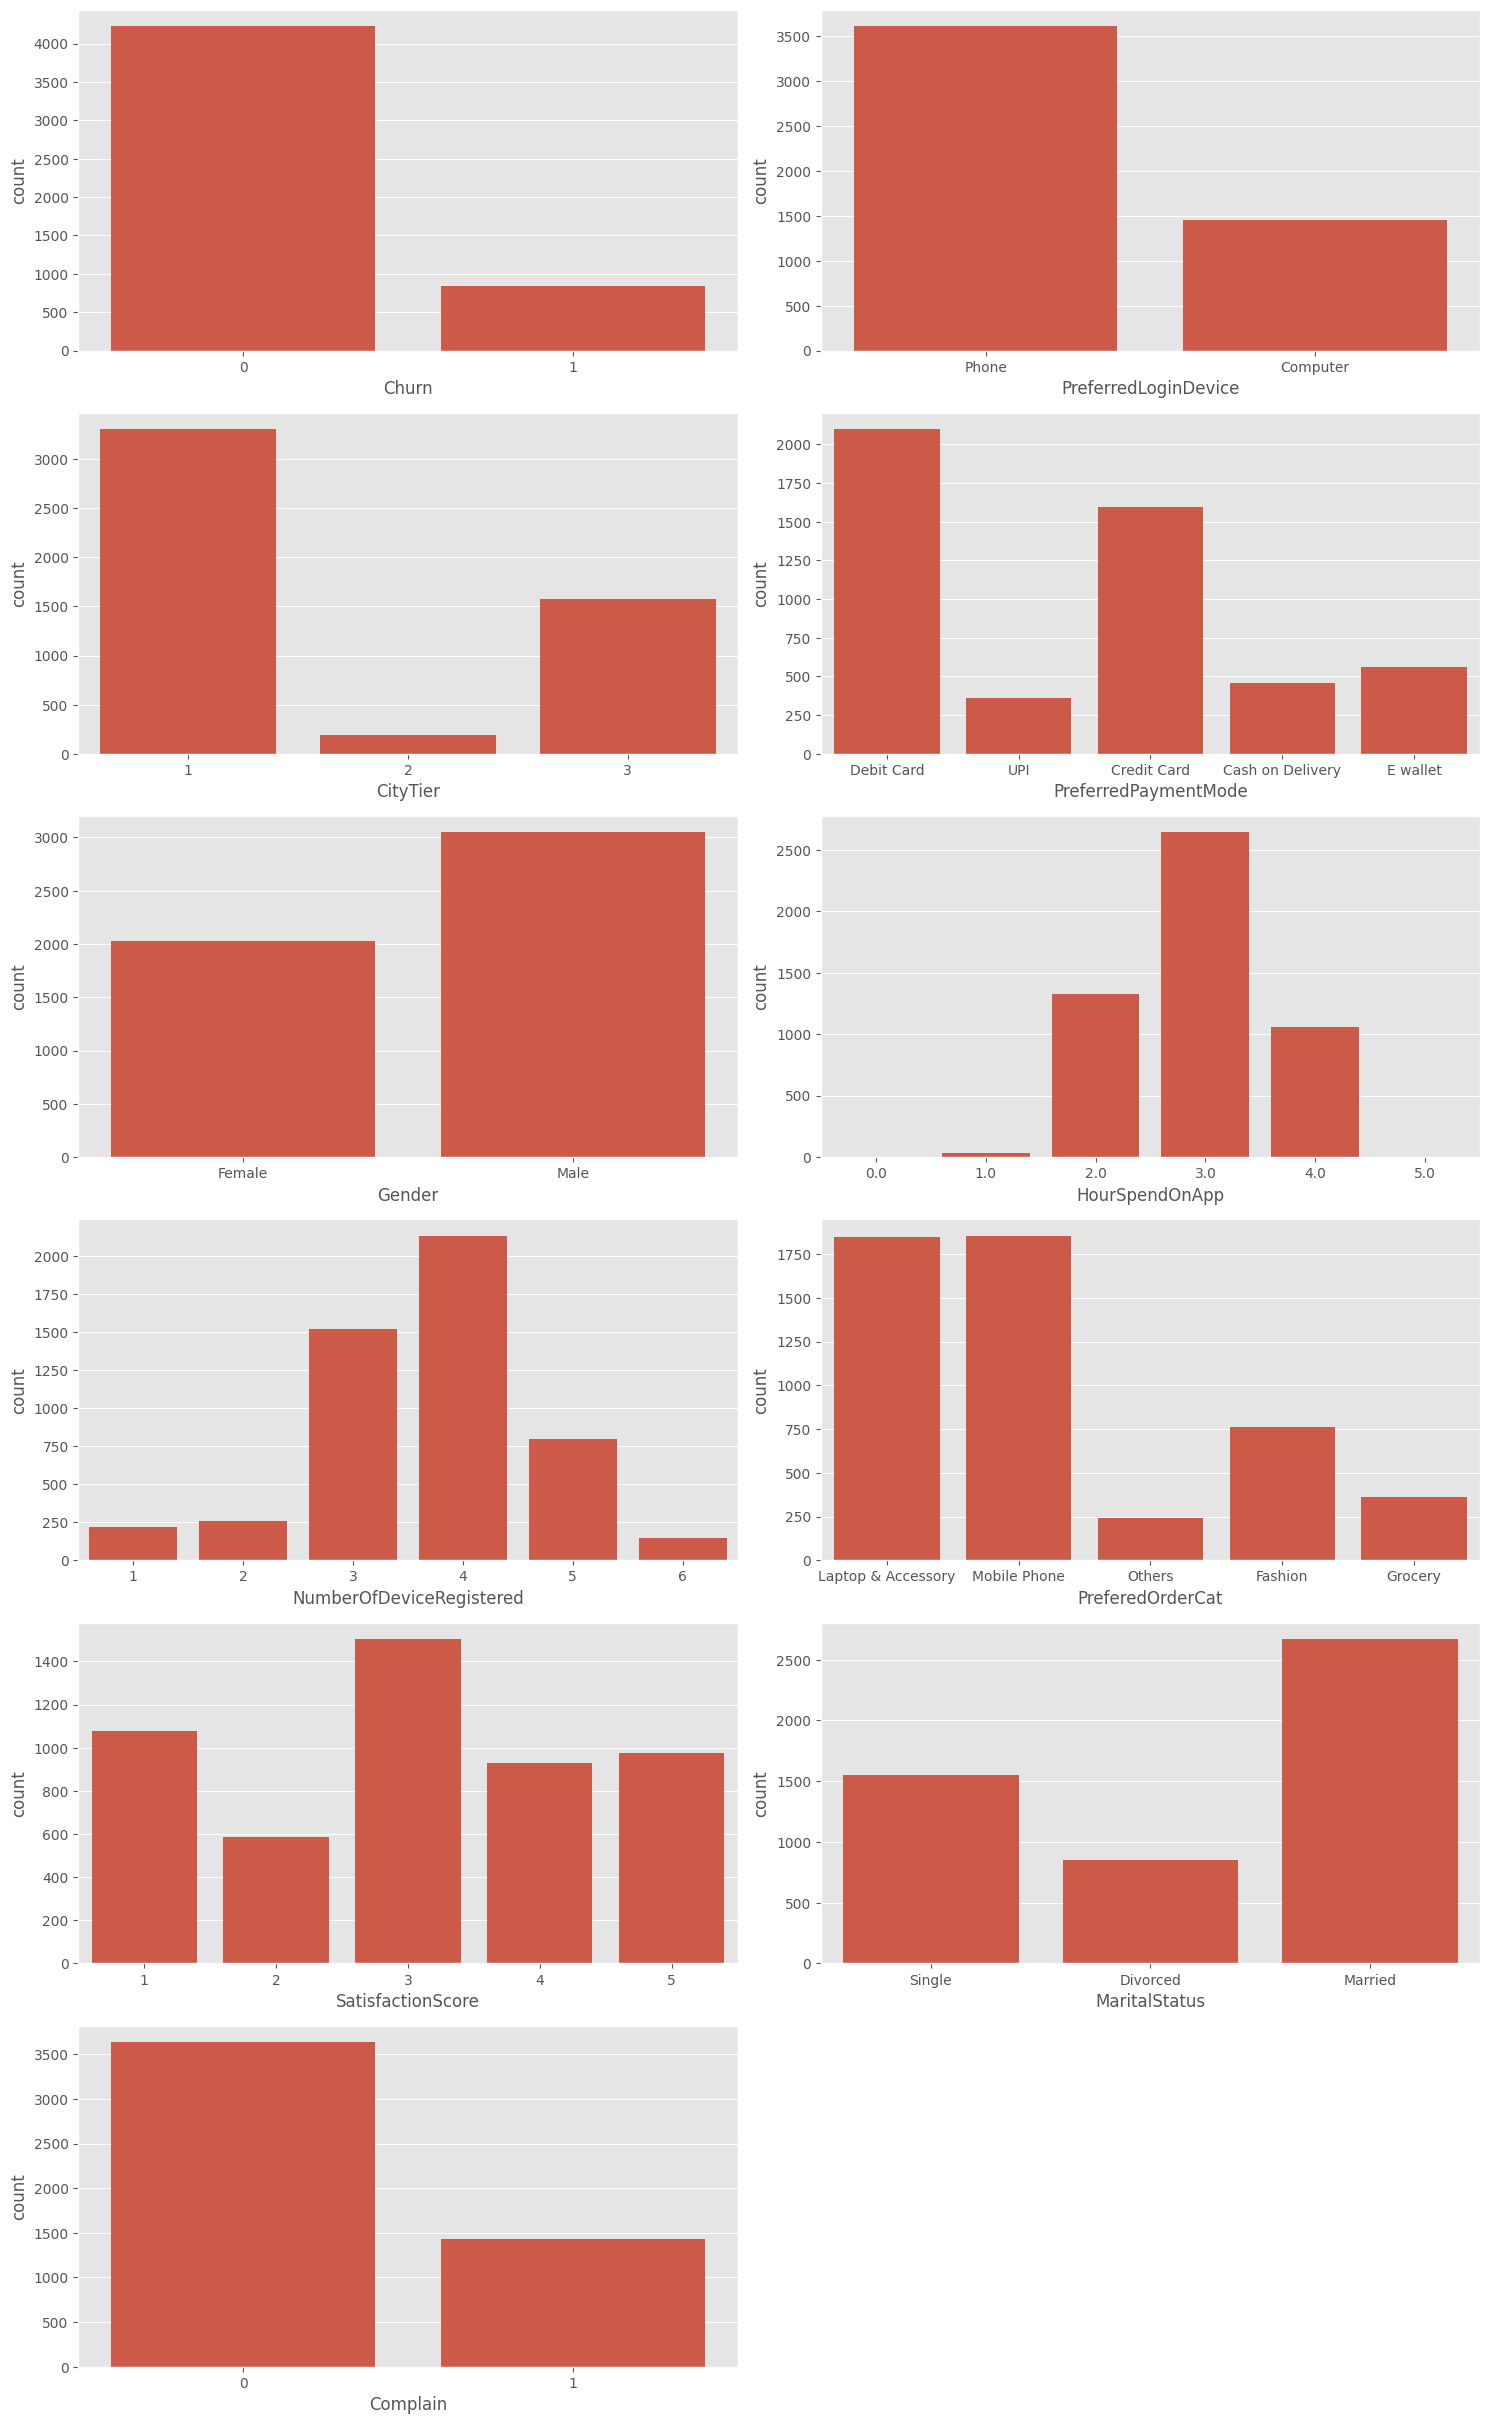

In [31]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    plt.subplot(10,2,plot_num)
    sns.countplot(data=df, x=col)
    plot_num += 1
    plt.tight_layout()

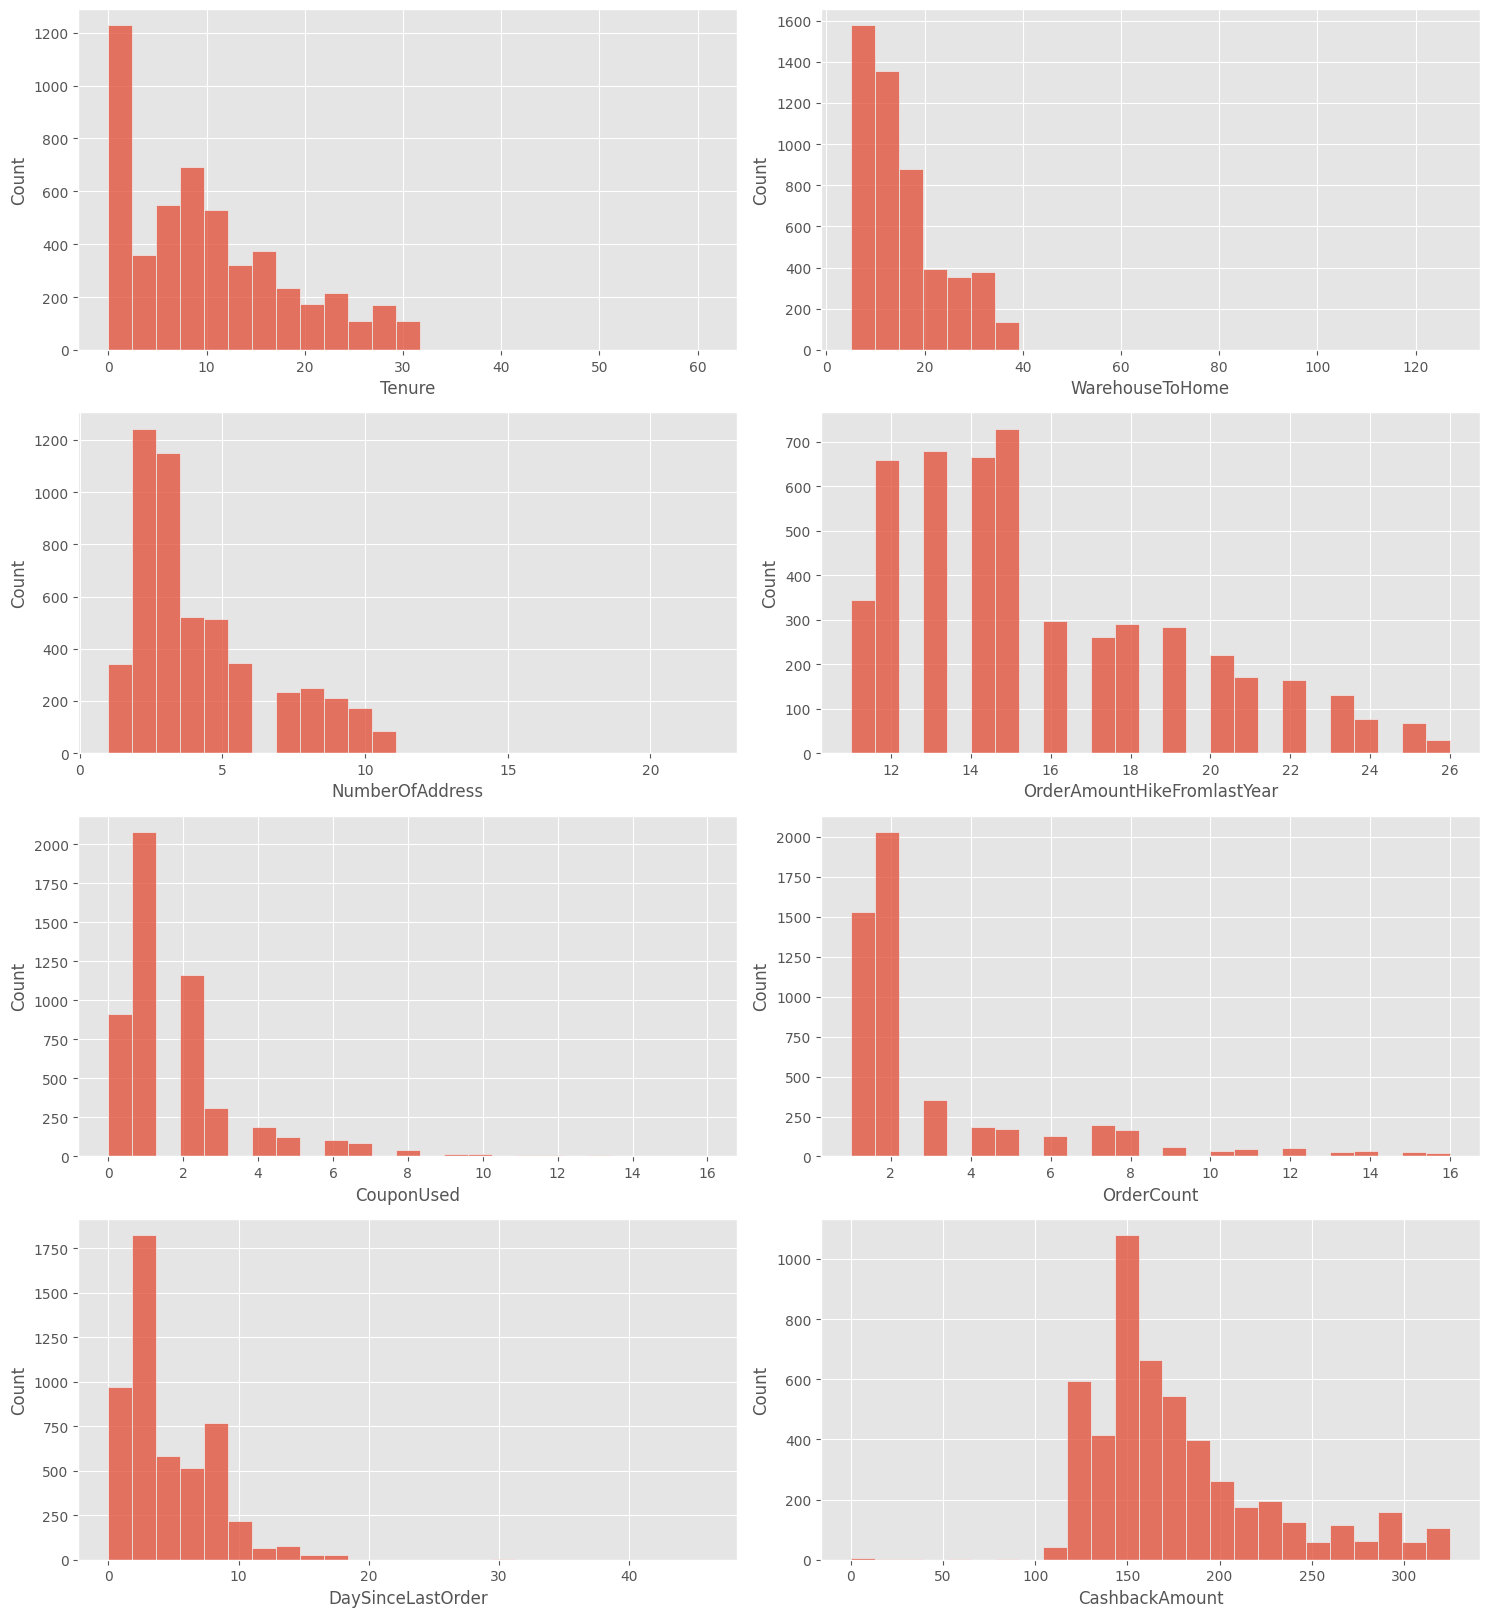

In [32]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in hist_col:
    plt.subplot(10,2,plot_num)
    sns.histplot(data=df, x=col,bins=25)
    plot_num += 1
    plt.tight_layout()

In [33]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

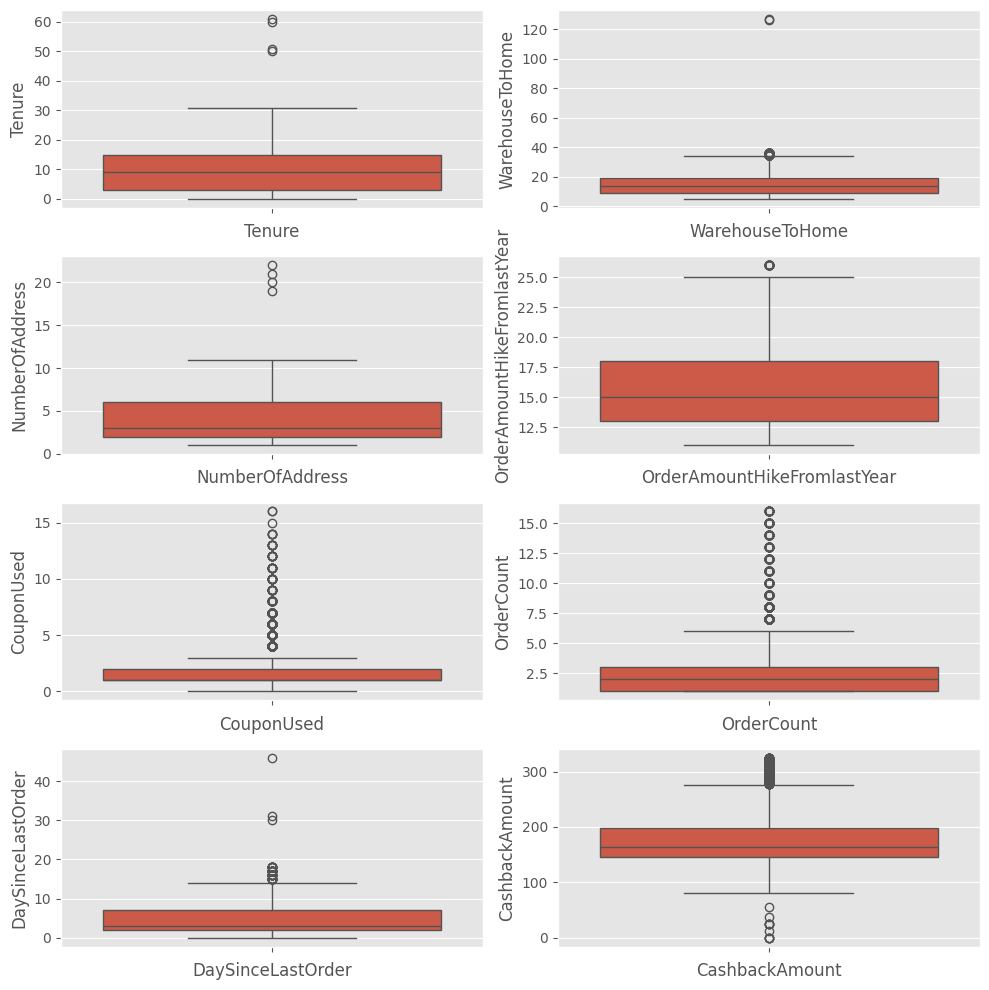

In [40]:
#Checking for Outlier
fig, axs = plt.subplots(4,2, figsize = (10,10))
plt1 = sns.boxplot(df['Tenure'], ax = axs[0,0]).set(xlabel= 'Tenure')
plt2 = sns.boxplot(df['WarehouseToHome'], ax = axs[0,1]).set(xlabel='WarehouseToHome')
plt1 = sns.boxplot(df['NumberOfAddress'], ax = axs[1,0]).set(xlabel='NumberOfAddress')
plt2 = sns.boxplot(df['OrderAmountHikeFromlastYear'], ax = axs[1,1]).set(xlabel='OrderAmountHikeFromlastYear')
plt1 = sns.boxplot(df['CouponUsed'], ax = axs[2,0]).set(xlabel='CouponUsed')
plt2 = sns.boxplot(df['OrderCount'], ax = axs[2,1]).set(xlabel='OrderCount')
plt1 = sns.boxplot(df['DaySinceLastOrder'], ax = axs[3,0]).set(xlabel='DaySinceLastOrder')
plt2 = sns.boxplot(df['CashbackAmount'], ax = axs[3,1]).set(xlabel='CashbackAmount')
plt.tight_layout()

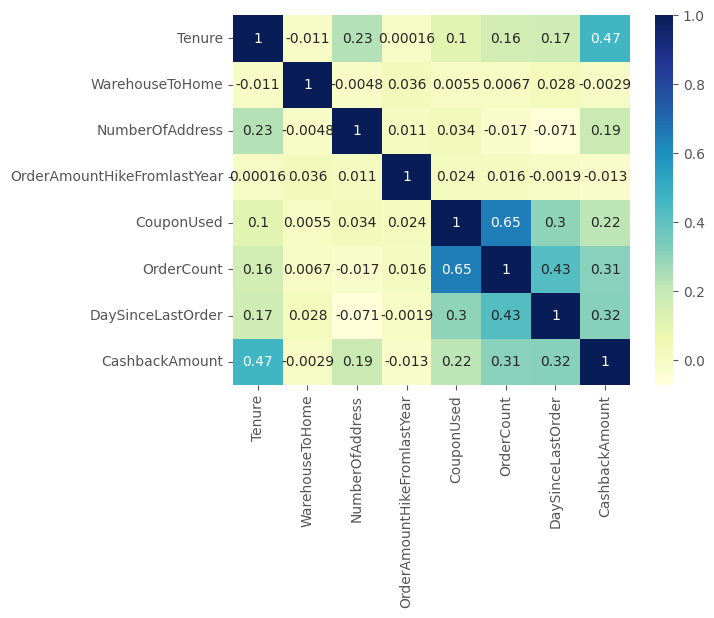

In [42]:
# Correlation heatmap
dataplot = sns.heatmap(df[['Tenure','WarehouseToHome','NumberOfAddress','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']].corr(),cmap='YlGnBu',annot=True)
plt.show()

In [45]:
# Target value counts
df['Churn'].value_counts()

Churn
0    4231
1     841
Name: count, dtype: int64

In [46]:
# Balancing the Imbalanced dataset
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['Churn'] == 0]
df_minority = df[df['Churn'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # Sample with replacement
                                 n_samples=len(df_majority),    # To match majority class
                                 random_state=42) # Reproducible results

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

df_balanced['Churn'].value_counts()

Churn
0    4231
1    4231
Name: count, dtype: int64

In [52]:
df.sample(10)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4336,0,7.0,Phone,1,9.0,Debit Card,Male,3.0,4,Mobile Phone,1,Single,2,0,15.0,2.0,2.0,3.0,150
2492,0,22.0,Phone,1,31.0,Debit Card,Female,2.0,3,Mobile Phone,5,Married,2,0,14.0,1.0,1.0,4.0,132
5104,0,2.0,Computer,1,8.0,Debit Card,Female,3.0,6,Laptop & Accessory,1,Married,2,0,12.0,8.0,8.0,6.0,192
376,0,9.0,Computer,1,9.0,Credit Card,Female,3.0,3,Mobile Phone,3,Married,2,0,20.0,1.0,1.0,0.0,121
5259,0,19.0,Phone,1,8.0,Cash on Delivery,Male,4.0,4,Fashion,4,Married,3,0,13.0,4.0,8.0,8.0,199
3534,0,4.0,Phone,3,17.0,E wallet,Male,4.0,5,Laptop & Accessory,3,Divorced,3,0,19.0,2.0,2.0,5.0,191
4318,0,14.0,Phone,3,11.0,E wallet,Male,4.0,5,Fashion,1,Married,9,0,12.0,2.0,2.0,12.0,234
882,1,0.0,Computer,1,20.0,UPI,Female,2.0,3,Fashion,2,Single,1,1,12.0,2.0,7.0,7.0,176
1731,0,10.0,Phone,1,20.0,Debit Card,Female,3.0,3,Mobile Phone,5,Married,2,0,12.0,10.0,12.0,17.0,130
1533,0,7.0,Computer,1,8.0,Debit Card,Male,2.0,4,Laptop & Accessory,3,Married,2,0,17.0,0.0,1.0,9.0,195


In [55]:
df.to_csv("Ecommerce_Churn_Dataset_Final.csv")

In [49]:
# Train Test Split of the dataset
X = df_balanced.drop('Churn',axis = 1 )
y = df_balanced['Churn']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=True)

X_train.shape,X_test.shape,y_train.shape, y_test.shape

((6769, 18), (1693, 18), (6769,), (1693,))

In [51]:
X_train.head(5)

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3748,1.0,Phone,3,31.0,Credit Card,Female,3.0,5,Laptop & Accessory,4,Single,2,1,24.0,3.0,11.0,11.0,171
4772,2.0,Phone,3,9.0,E wallet,Female,3.0,4,Laptop & Accessory,4,Married,3,1,21.0,7.0,8.0,6.0,173
5180,21.0,Phone,1,8.0,Cash on Delivery,Male,4.0,4,Mobile Phone,1,Married,9,0,13.0,2.0,2.0,3.0,159
1968,3.0,Computer,1,11.0,Debit Card,Male,3.0,4,Mobile Phone,1,Married,10,0,12.0,0.0,1.0,3.0,138
1738,7.0,Computer,3,10.0,E wallet,Female,3.0,3,Laptop & Accessory,3,Married,10,0,15.0,0.0,1.0,2.0,165


In [53]:
X_test.head(5)

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2134,7.0,Phone,2,6.0,Credit Card,Male,3.0,4,Fashion,5,Married,10,0,14.0,2.0,3.0,6.0,205
5365,1.0,Phone,1,9.0,Debit Card,Male,4.0,4,Mobile Phone,4,Single,3,0,13.0,1.0,2.0,1.0,139
775,9.0,Computer,1,9.0,Cash on Delivery,Male,2.0,3,Mobile Phone,4,Divorced,2,0,12.0,1.0,1.0,7.0,137
4142,14.0,Computer,3,7.0,Debit Card,Male,4.0,4,Laptop & Accessory,3,Married,9,0,13.0,2.0,2.0,2.0,192
1018,18.0,Computer,3,32.0,E wallet,Male,2.0,4,Laptop & Accessory,5,Married,2,0,15.0,0.0,4.0,5.0,144


In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6769 entries, 3748 to 1112
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tenure                       6769 non-null   float64
 1   PreferredLoginDevice         6769 non-null   object 
 2   CityTier                     6769 non-null   int64  
 3   WarehouseToHome              6769 non-null   float64
 4   PreferredPaymentMode         6769 non-null   object 
 5   Gender                       6769 non-null   object 
 6   HourSpendOnApp               6769 non-null   float64
 7   NumberOfDeviceRegistered     6769 non-null   int64  
 8   PreferedOrderCat             6769 non-null   object 
 9   SatisfactionScore            6769 non-null   int64  
 10  MaritalStatus                6769 non-null   object 
 11  NumberOfAddress              6769 non-null   int64  
 12  Complain                     6769 non-null   int64  
 13  OrderAmountHikeFroml

In [56]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(handle_unknown='ignore',drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0,2,3,6,7,9,11,12,13,14,15,16,17]),
            ('OHE', ohe, [1,4,5,8,10]),
        ],
        remainder='passthrough'
)


In [57]:
preprocesser

ColumnTransformer(remainder='passthrough',
                  transformers=[('StandardScale', StandardScaler(),
                                 [0, 2, 3, 6, 7, 9, 11, 12, 13, 14, 15, 16,
                                  17]),
                                ('OHE',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 [1, 4, 5, 8, 10])])

In [58]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [59]:
X_train.head(10)

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3748,1.0,Phone,3,31.0,Credit Card,Female,3.0,5,Laptop & Accessory,4,Single,2,1,24.0,3.0,11.0,11.0,171
4772,2.0,Phone,3,9.0,E wallet,Female,3.0,4,Laptop & Accessory,4,Married,3,1,21.0,7.0,8.0,6.0,173
5180,21.0,Phone,1,8.0,Cash on Delivery,Male,4.0,4,Mobile Phone,1,Married,9,0,13.0,2.0,2.0,3.0,159
1968,3.0,Computer,1,11.0,Debit Card,Male,3.0,4,Mobile Phone,1,Married,10,0,12.0,0.0,1.0,3.0,138
1738,7.0,Computer,3,10.0,E wallet,Female,3.0,3,Laptop & Accessory,3,Married,10,0,15.0,0.0,1.0,2.0,165
3263,1.0,Phone,3,15.0,Cash on Delivery,Male,3.0,5,Laptop & Accessory,5,Single,8,0,18.0,2.0,2.0,3.0,178
986,16.0,Phone,1,8.0,Cash on Delivery,Female,3.0,4,Fashion,1,Married,1,0,16.0,1.0,1.0,9.0,202
2366,0.0,Phone,3,15.0,Debit Card,Male,3.0,4,Mobile Phone,5,Married,4,0,12.0,2.0,2.0,2.0,144
5365,1.0,Phone,1,9.0,Debit Card,Male,4.0,4,Mobile Phone,4,Single,3,0,13.0,1.0,2.0,1.0,139
1864,2.0,Computer,1,6.0,Debit Card,Male,3.0,5,Mobile Phone,1,Married,2,0,18.0,0.0,2.0,8.0,127


In [60]:
X_test.head(10)

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
2134,7.0,Phone,2,6.0,Credit Card,Male,3.0,4,Fashion,5,Married,10,0,14.0,2.0,3.0,6.0,205
5365,1.0,Phone,1,9.0,Debit Card,Male,4.0,4,Mobile Phone,4,Single,3,0,13.0,1.0,2.0,1.0,139
775,9.0,Computer,1,9.0,Cash on Delivery,Male,2.0,3,Mobile Phone,4,Divorced,2,0,12.0,1.0,1.0,7.0,137
4142,14.0,Computer,3,7.0,Debit Card,Male,4.0,4,Laptop & Accessory,3,Married,9,0,13.0,2.0,2.0,2.0,192
1018,18.0,Computer,3,32.0,E wallet,Male,2.0,4,Laptop & Accessory,5,Married,2,0,15.0,0.0,4.0,5.0,144
1931,0.0,Computer,1,15.0,Debit Card,Male,3.0,4,Mobile Phone,4,Married,2,0,11.0,0.0,1.0,0.0,127
297,0.0,Phone,2,14.0,Cash on Delivery,Male,2.0,4,Mobile Phone,2,Single,2,0,12.0,1.0,1.0,0.0,126
2465,11.0,Phone,3,22.0,Debit Card,Female,2.0,3,Laptop & Accessory,4,Single,3,0,12.0,1.0,1.0,2.0,142
3007,16.0,Phone,1,15.0,Credit Card,Male,3.0,5,Laptop & Accessory,4,Divorced,4,0,16.0,8.0,8.0,8.0,174
3126,1.0,Phone,1,17.0,Credit Card,Male,3.0,6,Mobile Phone,2,Married,9,0,14.0,1.0,2.0,4.0,159


In [61]:
X_train_dummy

array([[-0.8371908 ,  1.32320174,  1.82193983, ...,  0.        ,
         0.        ,  1.        ],
       [-0.71185475,  1.32320174, -0.80865582, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.66953037, -0.78899083, -0.92822835, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.8371908 , -0.78899083, -1.04780088, ...,  0.        ,
         0.        ,  1.        ],
       [-0.08517445, -0.78899083, -0.80865582, ...,  0.        ,
         1.        ,  0.        ],
       [-0.96252686,  1.32320174, -1.16737341, ...,  0.        ,
         0.        ,  1.        ]])

In [62]:
X_test_dummy

array([[-0.08517445,  0.26710546, -1.16737341, ...,  0.        ,
         1.        ,  0.        ],
       [-0.8371908 , -0.78899083, -0.80865582, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.16549766, -0.78899083, -0.80865582, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.8371908 , -0.78899083, -0.80865582, ...,  0.        ,
         0.        ,  1.        ],
       [-0.96252686, -0.78899083, -0.21079317, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.04016161, -0.78899083, -0.92822835, ...,  0.        ,
         1.        ,  0.        ]])

In [63]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


# Define a list of classifiers
classifiers = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    #GaussianNB(),
    XGBClassifier()  
]

# Create a dictionary to store the results
results = {}

# Train and evaluate each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_dummy, y_train)
    y_pred = clf.predict(X_test_dummy)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{clf_name} Accuracy: {accuracy}")
    
    # Classification report
    print(f"Classification Report for {clf_name}:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    print(f"Confusion Matrix for {clf_name}:")
    print(confusion_matrix(y_test, y_pred))
    print("="*50)

RandomForestClassifier Accuracy: 0.9929119905493208
Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       838
           1       0.99      1.00      0.99       855

    accuracy                           0.99      1693
   macro avg       0.99      0.99      0.99      1693
weighted avg       0.99      0.99      0.99      1693

Confusion Matrix for RandomForestClassifier:
[[828  10]
 [  2 853]]
AdaBoostClassifier Accuracy: 0.8310691080921441
Classification Report for AdaBoostClassifier:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       838
           1       0.83      0.84      0.83       855

    accuracy                           0.83      1693
   macro avg       0.83      0.83      0.83      1693
weighted avg       0.83      0.83      0.83      1693

Confusion Matrix for AdaBoostClassifier:
[[688 150]
 [136 719]]
GradientBoostingCl

In [64]:
# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'F1-Score', 'Precision', 'Recall'])

# Train and evaluate each classifier
for clf in classifiers:
    clf_name = clf.__class__.__name__
    clf.fit(X_train_dummy, y_train)
    y_pred = clf.predict(X_test_dummy)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_score = report['weighted avg']['f1-score']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    
    # Append results to DataFrame
    results_df = pd.concat([results_df,pd.DataFrame([{'Model': clf_name, 'Accuracy': accuracy, 'F1-Score': f1_score, 
                                    'Precision': precision, 'Recall': recall}])], ignore_index=True)

results_df


,Model,Accuracy,F1-Score,Precision,Recall
0,RandomForestClassifier,0.991731,0.991730,0.991798,0.991731
1,AdaBoostClassifier,0.831069,0.831044,0.831132,0.831069
2,GradientBoostingClassifier,0.885411,0.885381,0.885599,0.885411
3,LogisticRegression,0.818074,0.818079,0.818140,0.818074
4,SVC,0.942705,0.942649,0.943931,0.942705
5,KNeighborsClassifier,0.932664,0.932356,0.939488,0.932664
6,DecisionTreeClassifier,0.987596,0.987594,0.987747,0.987596
7,XGBClassifier,0.988187,0.988184,0.988405,0.988187


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Train the RandomForestClassifier
rf_classifier.fit(X_train_dummy, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test_dummy)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Classification report
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("Confusion Matrix for Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.9917306556408741
Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       838
           1       0.99      1.00      0.99       855

    accuracy                           0.99      1693
   macro avg       0.99      0.99      0.99      1693
weighted avg       0.99      0.99      0.99      1693

Confusion Matrix for Random Forest Classifier:
[[825  13]
 [  1 854]]


In [66]:
# test 1:
print("predcted class ",rf_classifier.predict(X_test_dummy[110].reshape(1,-1))[0])
print("actual class ", y_test.iloc[110])

predcted class  1
actual class  1


In [67]:
print("predcted class ",rf_classifier.predict(X_test_dummy[20].reshape(1,-1))[0])
print("actual class ", y_test.iloc[20])

predcted class  1
actual class  1


In [68]:
# test 3:
print("predcted class ",rf_classifier.predict(X_test_dummy[120].reshape(1,-1))[0])
print("actual class ", y_test.iloc[120])


predcted class  1
actual class  1


In [69]:
# test 4:
print("predcted class ",rf_classifier.predict(X_test_dummy[122].reshape(1,-1))[0])
print("actual class ", y_test.iloc[122])

predcted class  0
actual class  0


In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6769 entries, 3748 to 1112
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tenure                       6769 non-null   float64
 1   PreferredLoginDevice         6769 non-null   object 
 2   CityTier                     6769 non-null   int64  
 3   WarehouseToHome              6769 non-null   float64
 4   PreferredPaymentMode         6769 non-null   object 
 5   Gender                       6769 non-null   object 
 6   HourSpendOnApp               6769 non-null   float64
 7   NumberOfDeviceRegistered     6769 non-null   int64  
 8   PreferedOrderCat             6769 non-null   object 
 9   SatisfactionScore            6769 non-null   int64  
 10  MaritalStatus                6769 non-null   object 
 11  NumberOfAddress              6769 non-null   int64  
 12  Complain                     6769 non-null   int64  
 13  OrderAmountHikeFroml

In [71]:
import numpy as np

def predict(Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount):
    
    # Prepare features array
    features = np.array([[Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount]], dtype=object)
    
    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)
    
    # predict by model
    result = rf_classifier.predict(transformed_features).reshape(1, -1)
    
    return result[0]

In [73]:
# test 1
Tenure = 7.0
PreferredLoginDevice = 'Phone'
CityTier = 1
WarehouseToHome = 9.0
PreferredPaymentMode = 'Debit Card'
Gender = 'Male' 
HourSpendOnApp = 3.0
NumberOfDeviceRegistered = 4
PreferedOrderCat = 'Mobile Phone'
SatisfactionScore = 1 
MaritalStatus = 'Single'
NumberOfAddress = 2 
Complain = 0 
OrderAmountHikeFromlastYear = 15.0
CouponUsed = 2.0
OrderCount = 2.0
DaySinceLastOrder = 3.0
CashbackAmount = 150

result = predict(Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount)


if result == 1:
    print("Possibility of Churn is High")
else: 
    print("Possibility of Churn is Low")


Possibility of Churn is Low


In [ ]:
#0	7.0	Phone	1	9.0	Debit Card	Male	3.0	4	Mobile Phone	1	Single	2	0	15.0	2.0	2.0	3.0	150

In [74]:
# test 2
Tenure = 0.0
PreferredLoginDevice = 'Computer'
CityTier = 1
WarehouseToHome = 20.0
PreferredPaymentMode = 'UPI'
Gender = 'Female' 
HourSpendOnApp = 2.0
NumberOfDeviceRegistered = 3
PreferedOrderCat = 'Fashion'
SatisfactionScore = 2
MaritalStatus = 'Single'
NumberOfAddress = 1
Complain = 1
OrderAmountHikeFromlastYear = 12.0
CouponUsed = 2.0
OrderCount = 7.0
DaySinceLastOrder = 7.0
CashbackAmount = 176

result = predict(Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount)


if result == 1:
    print("Possibility of Churn is High")
else: 
    print("Possibility of Churn is Low")

Possibility of Churn is High


In [ ]:
#1	0.0	Computer	1	20.0	UPI	Female	2.0	3	Fashion	2	Single	1	1	12.0	2.0	7.0	7.0	176


In [75]:
import pickle
pickle.dump(rf_classifier,open('rf_classifier.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))